In [ ]:
# split
# impute


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Import the library
from matplotlib_venn import venn3
from matplotlib.pyplot import figure

import scipy.stats as stats
from scipy.stats import chisquare
import matplotlib.patches as mpatches
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# drop unnecessary columns 
bank_churners = pd.read_csv('Data/BankChurners.csv').iloc[:,1:-2]

# replace existing customer to 0 and attrited customer to 1
bank_churners['Attrition_Flag'] = bank_churners['Attrition_Flag'].map({'Existing Customer' : 0, 'Attrited Customer' : 1})
bank_churners

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


### Bank Churners Table

- `Attrition_Flag`: Internal event (customer activity) variable - if the account is closed then 1 else 0
- `Customer_Age`: Demographic variable - Customer's Age in Years
- `Gender`: Demographic variable - M=Male, F=Female
- `Dependent_count`: Demographic variable - Number of dependents
- `Education_Level`: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- `Marital_Status`: Demographic variable - Married, Single, Divorced, Unknown
- `Income_Category`: Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
- `Card_Category`: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- `Months_on_book`: Period of relationship with bank
- `Total_Relationship_Count`: Total no. of products held by the customer
- `Months_Inactive_12_mon`: No. of months inactive in the last 12 months
- `Contacts_Count_12_mon`: No. of Contacts in the last 12 months
- `Credit_Limit`: Credit Limit on the Credit Card
- `Total_Revolving_Bal`: Total Revolving Balance on the Credit Card
- `Avg_Open_To_Buy`: Open to Buy* Credit Line (Average of last 12 months)
- `Total_Amt_Chng_Q4_Q1`: Change in Transaction Amount (Q4 over Q1)
- `Total_Trans_Amt`: Total Transaction Amount (Last 12 months)
- `Total_Trans_Ct`: Total Transaction Count (Last 12 months)
- `Total_Ct_Chng_Q4_Q1`: Change in Transaction Count (Q4 over Q1) 
- `Avg_Utilization_Ratio`: Average Card Utilization Ratio***


*Open-to-buy: The difference between the credit limit assigned to a cardholder account and the present balance on the account.

***Average Card Utilization Ratio: Amount client owes divided by credit limit. (Total_Revolving_Bal / Credit_Limit)


In [4]:
# count of records and columns
bank_churners.shape

(10127, 20)

In [5]:
# look at datatypes and missing values
bank_churners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [6]:
# unique values per feature
for col in bank_churners.columns:
    num_values = bank_churners[col].nunique()
    print(col, ": ", num_values)

Attrition_Flag :  2
Customer_Age :  45
Gender :  2
Dependent_count :  6
Education_Level :  7
Marital_Status :  4
Income_Category :  6
Card_Category :  4
Months_on_book :  44
Total_Relationship_Count :  6
Months_Inactive_12_mon :  7
Contacts_Count_12_mon :  7
Credit_Limit :  6205
Total_Revolving_Bal :  1974
Avg_Open_To_Buy :  6813
Total_Amt_Chng_Q4_Q1 :  1158
Total_Trans_Amt :  5033
Total_Trans_Ct :  126
Total_Ct_Chng_Q4_Q1 :  830
Avg_Utilization_Ratio :  964


In [3]:
bank_churners.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Distinguishing Categorical and Numeric Variables 

Although Total_Relationship_Count, Months_Inactive_12_mon, and Contacts_Count_12_mon are numeric features, we will classify them as categorical variables becuase they have a small amount of unique values.

In [6]:
categorical_columns = list(bank_churners.select_dtypes('object').columns)
categorical_columns.extend(['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon'])
print("Categorical Features: ",categorical_columns)
print()
numerical_columns = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns = [i for i in numerical_columns if i not in ('Dependent_count','Attrition_Flag','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]
print("Numerical Features: ", numerical_columns)
print()
print('Target Variable: Attrition_Flag')

# includes attrition
numerical_columns_attrition = list(bank_churners.select_dtypes(exclude=['object']).columns)
numerical_columns_attrition = [i for i in numerical_columns if i not in ('Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon')]

Categorical Features:  ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

Numerical Features:  ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Target Variable: Attrition_Flag


In [7]:
print('Percentage of Credit Card Users Who Attrited:', np.round(len(bank_churners[bank_churners['Attrition_Flag']==1]) / len(bank_churners) * 100, 2), '%')
print('Percentage Unknown Variables:', np.round(len(bank_churners[bank_churners.replace('Unknown',np.nan).isna().any(axis=1)]) / len(bank_churners) * 100,2), '%')

Percentage of Credit Card Users Who Attrited: 16.07 %
Percentage Unknown Variables: 30.08 %


# Train-Test Split

In [8]:
X = bank_churners.iloc[:,1:]
y = bank_churners.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number X_train dataset: ", X_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", X_test.shape)
print("Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
# \train = X_train.merge(y_train,on=X_train.index).drop('key_0',axis=1)
# test = X_test.merge(y_test,on=X_test.index).drop('key_0',axis=1)

Number X_train dataset:  (8101, 19)
Number y_train dataset:  (8101,)
Number X_test dataset:  (2026, 19)
Number y_test dataset:  (2026,)
Before OverSampling, counts of label '1': 1318
Before OverSampling, counts of label '0': 6783 



# Handling Missing Data

## Visualizing Missing Data

### Heatmap

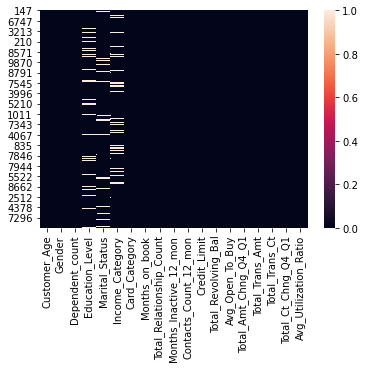

In [9]:
sns.heatmap(X_train.replace('Unknown',np.nan).isnull())

In [10]:
imputation_cols = ['Education_Level','Marital_Status','Income_Category']

### Distribution of Columns with Missing Values

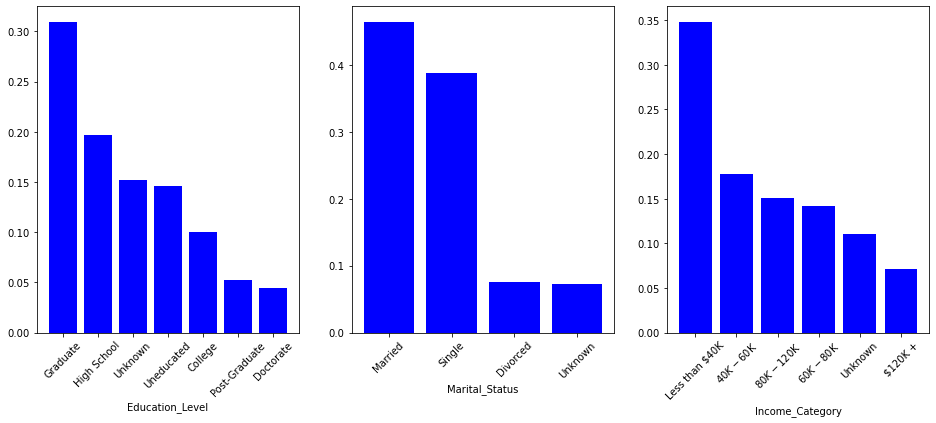

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=X_train[col].value_counts().index,height=X_train[col].value_counts(normalize=True),color = 'blue')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    count+=1

`Marital_Status` : The customers are mostly married or single, with a similar amount claiming they were divorced or 'unknown'.

`Education_Level` : A plurality of credit card users claimed to have a least a graduate level. The unknown category ranks third in count.

`Income_Category` : The 'Unknown" category is the second to least most frequent category.

### Venn Diagram

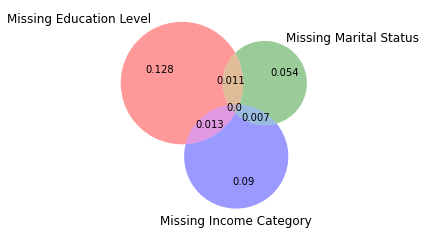

Percentage of Users with Missing Education Level:  15.158622392297247
Percentage of Users with Missing Marital Status:  7.208986544871003
Percentage of Users with Missing Income Category:  11.035674608073078
Total Percentage of Users with Missing Value(s):  30.218491544253794


In [12]:
# visualizing missing values
unknown_education_level = len(X_train[X_train['Education_Level'] == 'Unknown']) / len(X_train)
unknown_marital_status = len(X_train[X_train['Marital_Status']== 'Unknown']) / len(X_train)
unknown_income_category = len(X_train[X_train['Income_Category']== 'Unknown']) / len(X_train)
unknown_education_level_and_marital_status_only = len(X_train[(X_train['Education_Level']== 'Unknown') & (X_train['Marital_Status']== 'Unknown') & (X_train['Income_Category']!= 'Unknown')]) /len(X_train)
unknown_education_level_and_income_category_only = len(X_train[(X_train['Education_Level']== 'Unknown') & (X_train['Marital_Status']!= 'Unknown') & (X_train['Income_Category']== 'Unknown')]) /len(X_train)
unknown_income_category_and_marital_status_only = len(X_train[(X_train['Education_Level'] != 'Unknown') & (X_train['Marital_Status']== 'Unknown') & (X_train['Income_Category'] == 'Unknown')]) /len(X_train)
unknown_total = len(X_train[(X_train['Education_Level']== 'Unknown') | (X_train['Marital_Status']== 'Unknown') | (X_train['Income_Category']== 'Unknown')]) /len(X_train)

X_train_nan = X_train.replace('Unknown',np.nan)
unknown_education_level_only = len(X_train[(X_train['Education_Level']== 'Unknown') & (X_train['Marital_Status']!= 'Unknown') & (X_train['Income_Category']!= 'Unknown')]) /len(X_train)
unknown_income_category_only = len(X_train[(X_train['Education_Level']!= 'Unknown') & (X_train['Marital_Status']!= 'Unknown') & (X_train['Income_Category']== 'Unknown')]) /len(X_train)
unknown_marital_status_only = len(X_train[(X_train['Education_Level']!= 'Unknown') & (X_train['Marital_Status']== 'Unknown') & (X_train['Income_Category']!= 'Unknown')]) /len(X_train)
unknown_all = len(X_train[(X_train['Education_Level']== 'Unknown') & (X_train['Marital_Status']== 'Unknown') & (X_train['Income_Category']== 'Unknown')]) /len(X_train)


# A: Education_Level
# B: Marital_Status
# C: Income_Category
venn3(subsets = (round(unknown_education_level_only,3), round(unknown_marital_status_only,3),
                 round(unknown_education_level_and_marital_status_only,3), round(unknown_income_category_only,3),
                 round(unknown_education_level_and_income_category_only,3),round(unknown_income_category_and_marital_status_only,3),
                 round(unknown_all,3)),
                set_labels = ('Missing Education Level', 'Missing Marital Status', 'Missing Income Category'))
plt.show()

print('Percentage of Users with Missing Education Level: ', unknown_education_level*100)
print('Percentage of Users with Missing Marital Status: ', unknown_marital_status*100)
print('Percentage of Users with Missing Income Category: ', unknown_income_category*100)
print('Total Percentage of Users with Missing Value(s): ', 100* len(X_train_nan[X_train_nan.isna().any(axis=1)]) / len(X_train_nan))


### Missing Values Observations
As we can see, 30% of the data contains one or more missing values. But, there's not much overlap between those missing values because only .01% of the data has all three missing features. About half of the missing data comes from records with missing education level, with income category coming in second and then marital status. 

In [13]:
X_train['missing_marital_status'] = np.where(X_train['Marital_Status'] == 'Unknown',1,0)
X_train['missing_education_level'] = np.where(X_train['Education_Level'] == 'Unknown',1,0)
X_train['missing_income_category'] = np.where(X_train['Income_Category'] == 'Unknown',1,0)
missing_columns = ['missing_marital_status','missing_education_level','missing_income_category']

<ipython-input-13-9e7d230cfeea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['missing_marital_status'] = np.where(X_train['Marital_Status'] == 'Unknown',1,0)
<ipython-input-13-9e7d230cfeea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['missing_education_level'] = np.where(X_train['Education_Level'] == 'Unknown',1,0)
<ipython-input-13-9e7d230cfeea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [14]:
X_test['missing_marital_status'] = np.where(X_test['Marital_Status'] == 'Unknown',1,0)
X_test['missing_education_level'] = np.where(X_test['Education_Level'] == 'Unknown',1,0)
X_test['missing_income_category'] = np.where(X_test['Income_Category'] == 'Unknown',1,0)

<ipython-input-14-92ee2ca1db12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['missing_marital_status'] = np.where(X_test['Marital_Status'] == 'Unknown',1,0)
<ipython-input-14-92ee2ca1db12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['missing_education_level'] = np.where(X_test['Education_Level'] == 'Unknown',1,0)
<ipython-input-14-92ee2ca1db12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

## Imputing Missing Values (Using Random Imputation)

### Substitute Unknown Values with Most Frequent Values 

In [15]:
# replace Unknown with random choice
X_train = X_train.replace('Unknown',np.nan)

def missing_to_random(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #df.loc[df[variable].isnull(),variable]=random_sample
    return random_sample

for col in imputation_cols:
    X_train.loc[X_train[col].isnull(),col] = missing_to_random(X_train,col)
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,missing_marital_status,missing_education_level,missing_income_category
147,55,M,2,Graduate,Married,$120K +,Blue,50,3,2,...,1536,9380.0,1.317,1592,34,1.000,0.141,0,0,0
1985,32,M,0,Graduate,Single,NaN,Blue,27,6,3,...,0,9238.0,0.809,2522,68,0.478,0.000,0,0,1
8316,35,F,4,Uneducated,Married,NaN,Blue,25,2,3,...,587,2792.0,0.670,5121,80,0.702,0.174,0,0,1
2841,40,F,2,NaN,Married,Less than $40K,Blue,36,3,1,...,2376,2717.0,0.822,2341,57,0.541,0.467,0,1,0
5824,45,F,4,High School,Married,$40K - $60K,Blue,36,5,2,...,2232,716.0,0.858,3635,79,0.580,0.757,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,30,M,0,NaN,Single,$60K - $80K,Blue,20,1,3,...,1349,22411.0,0.961,13124,103,0.746,0.057,0,1,0
4859,50,M,2,Uneducated,Single,$60K - $80K,Blue,43,4,3,...,642,3746.0,0.815,3836,81,0.723,0.146,0,0,0
3264,60,M,1,NaN,Single,$60K - $80K,Blue,50,4,3,...,1790,8908.0,0.981,4095,67,0.914,0.167,0,1,0
9845,51,M,3,College,Married,$120K +,Blue,40,3,3,...,1476,33040.0,0.763,14145,119,0.776,0.043,0,0,0


### Imputed Values Histogram

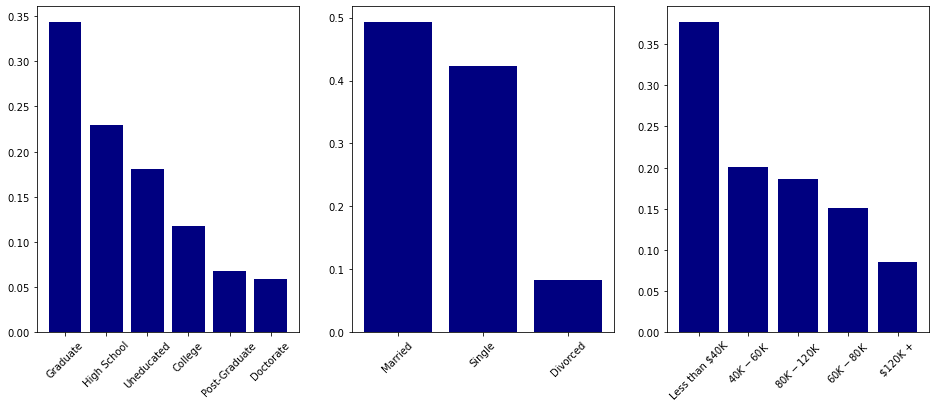

In [16]:
missing_to_random(X_train,col)

figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=X_train[col].value_counts().index,height=missing_to_random(X_train,col).value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

### Final Table Histogram

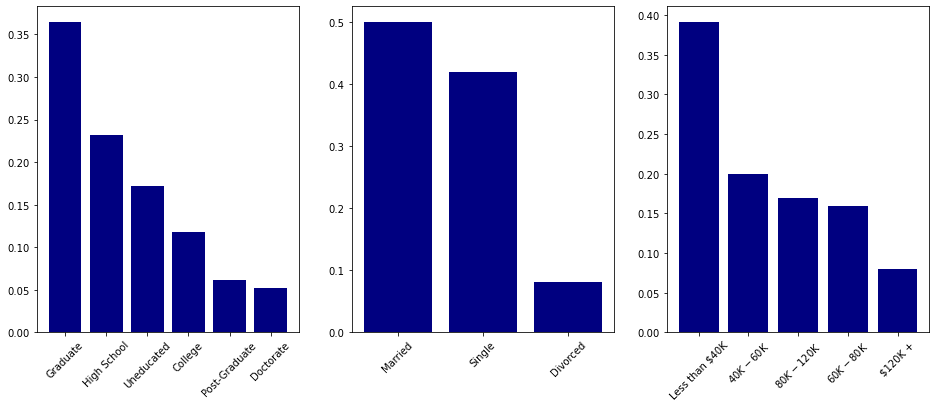

In [17]:
figure(num=None, figsize=(16, 6))
count=1
for col in imputation_cols:
    plt.subplot(1, 3, count)
    plt.bar(x=X_train[col].value_counts().index,height=X_train[col].value_counts(normalize=True),color = 'navy')
    plt.xticks(rotation=45)
    count+=1

## Imputing Missing Values for Test Data

In [18]:
# replace Unknown with random choice
X_test = X_test.replace('Unknown',np.nan)


for col in imputation_cols:
    X_test.loc[X_test[col].isnull(),col] = missing_to_random(X_test,col)

In [19]:
X_train.to_csv('X_train_prepared.csv',index=False)
X_test.to_csv('X_test_prepared.csv',index=False)

In [20]:
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [21]:
X_train.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'missing_marital_status', 'missing_education_level',
       'missing_income_category'],
      dtype='object')